## Non-parametric Regression

<img src="../img/reg4.png" width="800">

- Nonparametric regression is a collection of techniques for fitting a curve when there is little a priori knowledge about its shape.
- The simplest nonparametric regression estimators are local versions of location estimators. For a random variable (x, y), the regression curve **μ(x) = E(y|x)**
- The model immediately adapts as we receive new training examples, but computational complexity grows lineary with the number of samples.
<img src="../img/reg11.png" width="700">

## K-Nearest Neighbors

This method follows the intuition that you look like your neighbors. More formally, the method follows the compactness hypothesis: if the distance between the examples is measured well enough, then similar examples are much more likely to belong to the same class.

<img src="../img/knn1.png" width="500" align="center">

A case is classified by a majority vote of its neighbors, with the case being assigned to the class most common amongst its K nearest neighbors measured by a distance function. If K = 1, then the case is simply assigned to the class of its nearest neighbor. 

<img src="../img/KNN_similarity.png" width="400" align="center">

Many more types of distances: Mahalanobis, rank-based, correlation-based, cosine similarity, Manhattan, Hamming.

### KNN Algorithm

```python
def knn(K):
    for all data points:
        calculate distance to all other points
        select K neighbors
        set t = average values of neighbors
    return t     
```

$$\Large Predicted = \frac{1}{K} \sum\limits_{x_i \in N} y_i $$

<img src="../img/reg14.png" width="800" align="center">

### Code Dictionary
code | description
-----|------------
`.KNeighborsRegressor` | Regression model with Decision Trees.
`.arrange()` | Generates evenly spaced values within a given interval.
`.reshape()` | Gives a new shape to an array without changing its data.

In [1]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error 
from math import sqrt
%matplotlib inline

In [2]:
dataset = pd.read_csv("../datasets/salary_data.csv")
X = dataset['YearsExperience']
y = dataset['Salary']

#### Train Test Split

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

### Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [5]:
x_train_scaled = scaler.fit_transform(X_train.values.reshape(-1, 1))
X_train = pd.DataFrame(x_train_scaled)

In [6]:
x_test_scaled = scaler.fit_transform(X_test.values.reshape(-1, 1))
X_test = pd.DataFrame(x_test_scaled)

## KNN Model

We'll start with k=1.

In [7]:
from sklearn.neighbors import KNeighborsRegressor

In [8]:
knn = KNeighborsRegressor(n_neighbors=1)

In [11]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform')

In [12]:
predicted = knn.predict(X_test)

Text(0,0.5,'Predicted')

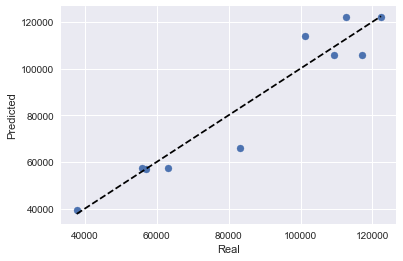

In [13]:
plt.scatter(y_test, predicted)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Real')
plt.ylabel('Predicted')

## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [14]:
range_of_neighbors = range(1,10)

In [15]:
rmse_val = [] 
for K in range_of_neighbors:
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  #fit the model
    pred = model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values

Text(0,0.5,'Error Rate')

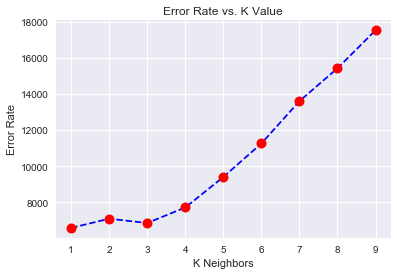

In [16]:
plt.plot(range_of_neighbors, rmse_val, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Neighbors')
plt.ylabel('Error Rate')

### Distance functions  

The most critical choice in computing nearest neighbors is the distance function that measures the dissimilarity between any pair of observations. [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html)

In [17]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':list(range_of_neighbors),
         'metric':['minkowski','euclidean','manhattan']}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'metric': 'minkowski', 'n_neighbors': 2}